<a href="https://colab.research.google.com/github/SushmitaSamaddar5/Global_Climate_Change/blob/main/Climate_Change__Clustering_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Climate Change Time Series Prediction

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 200
import seaborn as sns
import math
from scipy import stats
from scipy.stats import norm

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/content/climate_change_indicators.csv')

In [3]:
df

,ObjectId,Country,ISO2,ISO3,Indicator,Unit,Source,CTS_Code,CTS_Name,CTS_Full_Descriptor,...,F2013,F2014,F2015,F2016,F2017,F2018,F2019,F2020,F2021,F2022
0,1,"Afghanistan, Islamic Rep. of",AF,AFG,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,1.281,0.456,1.093,1.555,1.540,1.544,0.910,0.498,1.327,2.012
1,2,Albania,AL,ALB,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,1.333,1.198,1.569,1.464,1.121,2.028,1.675,1.498,1.536,1.518
2,3,Algeria,DZ,DZA,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,1.192,1.690,1.121,1.757,1.512,1.210,1.115,1.926,2.330,1.688
3,4,American Samoa,AS,ASM,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,1.257,1.170,1.009,1.539,1.435,1.189,1.539,1.430,1.268,1.256
4,5,"Andorra, Principality of",AD,AND,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,0.831,1.946,1.690,1.990,1.925,1.919,1.964,2.562,1.533,3.243
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220,221,Western Sahara,EH,ESH,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,1.423,1.401,1.510,1.732,2.204,0.942,1.477,2.069,1.593,1.970
221,222,World,NaN,WLD,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,1.016,1.053,1.412,1.660,1.429,1.290,1.444,1.711,1.447,1.394
222,223,"Yemen, Rep. of",YE,YEM,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
223,224,Zambia,ZM,ZMB,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,0.790,0.917,1.450,1.401,0.105,0.648,0.855,0.891,0.822,0.686


In [4]:
df.head(10)

,ObjectId,Country,ISO2,ISO3,Indicator,Unit,Source,CTS_Code,CTS_Name,CTS_Full_Descriptor,...,F2013,F2014,F2015,F2016,F2017,F2018,F2019,F2020,F2021,F2022
0,1,"Afghanistan, Islamic Rep. of",AF,AFG,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,1.281,0.456,1.093,1.555,1.540,1.544,0.910,0.498,1.327,2.012
1,2,Albania,AL,ALB,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,1.333,1.198,1.569,1.464,1.121,2.028,1.675,1.498,1.536,1.518
2,3,Algeria,DZ,DZA,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,1.192,1.690,1.121,1.757,1.512,1.210,1.115,1.926,2.330,1.688
3,4,American Samoa,AS,ASM,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,1.257,1.170,1.009,1.539,1.435,1.189,1.539,1.430,1.268,1.256
4,5,"Andorra, Principality of",AD,AND,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,0.831,1.946,1.690,1.990,1.925,1.919,1.964,2.562,1.533,3.243
5,6,Angola,AO,AGO,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,1.044,0.828,1.331,1.609,0.870,1.395,1.752,1.162,1.553,1.212
6,7,Anguilla,AI,AIA,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,0.770,0.814,1.051,1.125,0.960,0.664,0.843,1.224,0.893,0.839
7,8,Antigua and Barbuda,AG,ATG,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,0.783,0.744,1.035,1.097,0.958,0.627,0.797,1.131,0.862,0.770
8,9,Argentina,AR,ARG,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,0.442,0.951,0.957,0.488,1.095,0.878,0.760,1.123,1.031,0.643
9,10,"Armenia, Rep. of",AM,ARM,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,1.407,1.283,1.931,1.356,0.889,2.772,1.859,1.954,2.087,1.707


In [5]:
df.tail(10)

,ObjectId,Country,ISO2,ISO3,Indicator,Unit,Source,CTS_Code,CTS_Name,CTS_Full_Descriptor,...,F2013,F2014,F2015,F2016,F2017,F2018,F2019,F2020,F2021,F2022
215,216,Vanuatu,VU,VUT,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,0.706,0.585,0.573,1.146,1.131,0.613,0.897,1.226,1.147,1.479
216,217,"Venezuela, Rep. Bolivariana de",VE,VEN,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,0.941,0.865,1.094,1.098,0.726,0.843,1.235,1.350,0.734,0.533
217,218,Vietnam,VN,VNM,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,0.895,0.540,1.222,1.191,1.121,0.817,1.811,1.477,1.114,1.033
218,219,Wallis and Futuna Islands,WF,WLF,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,0.773,0.686,0.724,1.267,1.062,0.920,1.379,1.274,1.029,0.951
219,220,West Bank and Gaza,PS,PSE,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,1.114,0.863,1.326,1.615,0.735,2.007,1.204,1.455,1.787,1.074
220,221,Western Sahara,EH,ESH,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,1.423,1.401,1.510,1.732,2.204,0.942,1.477,2.069,1.593,1.970
221,222,World,NaN,WLD,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,1.016,1.053,1.412,1.660,1.429,1.290,1.444,1.711,1.447,1.394
222,223,"Yemen, Rep. of",YE,YEM,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
223,224,Zambia,ZM,ZMB,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,0.790,0.917,1.450,1.401,0.105,0.648,0.855,0.891,0.822,0.686
224,225,Zimbabwe,ZW,ZWE,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,0.118,0.025,0.970,1.270,0.088,0.453,0.925,0.389,-0.125,-0.490


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225 entries, 0 to 224
Data columns (total 72 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ObjectId             225 non-null    int64  
 1   Country              225 non-null    object 
 2   ISO2                 223 non-null    object 
 3   ISO3                 225 non-null    object 
 4   Indicator            225 non-null    object 
 5   Unit                 225 non-null    object 
 6   Source               225 non-null    object 
 7   CTS_Code             225 non-null    object 
 8   CTS_Name             225 non-null    object 
 9   CTS_Full_Descriptor  225 non-null    object 
 10  F1961                188 non-null    float64
 11  F1962                189 non-null    float64
 12  F1963                188 non-null    float64
 13  F1964                188 non-null    float64
 14  F1965                188 non-null    float64
 15  F1966                192 non-null    flo

Data Cleaning

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix, precision_recall_fscore_support, roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
# Machine learning algorithms
from sklearn.linear_model import LinearRegression, LogisticRegression

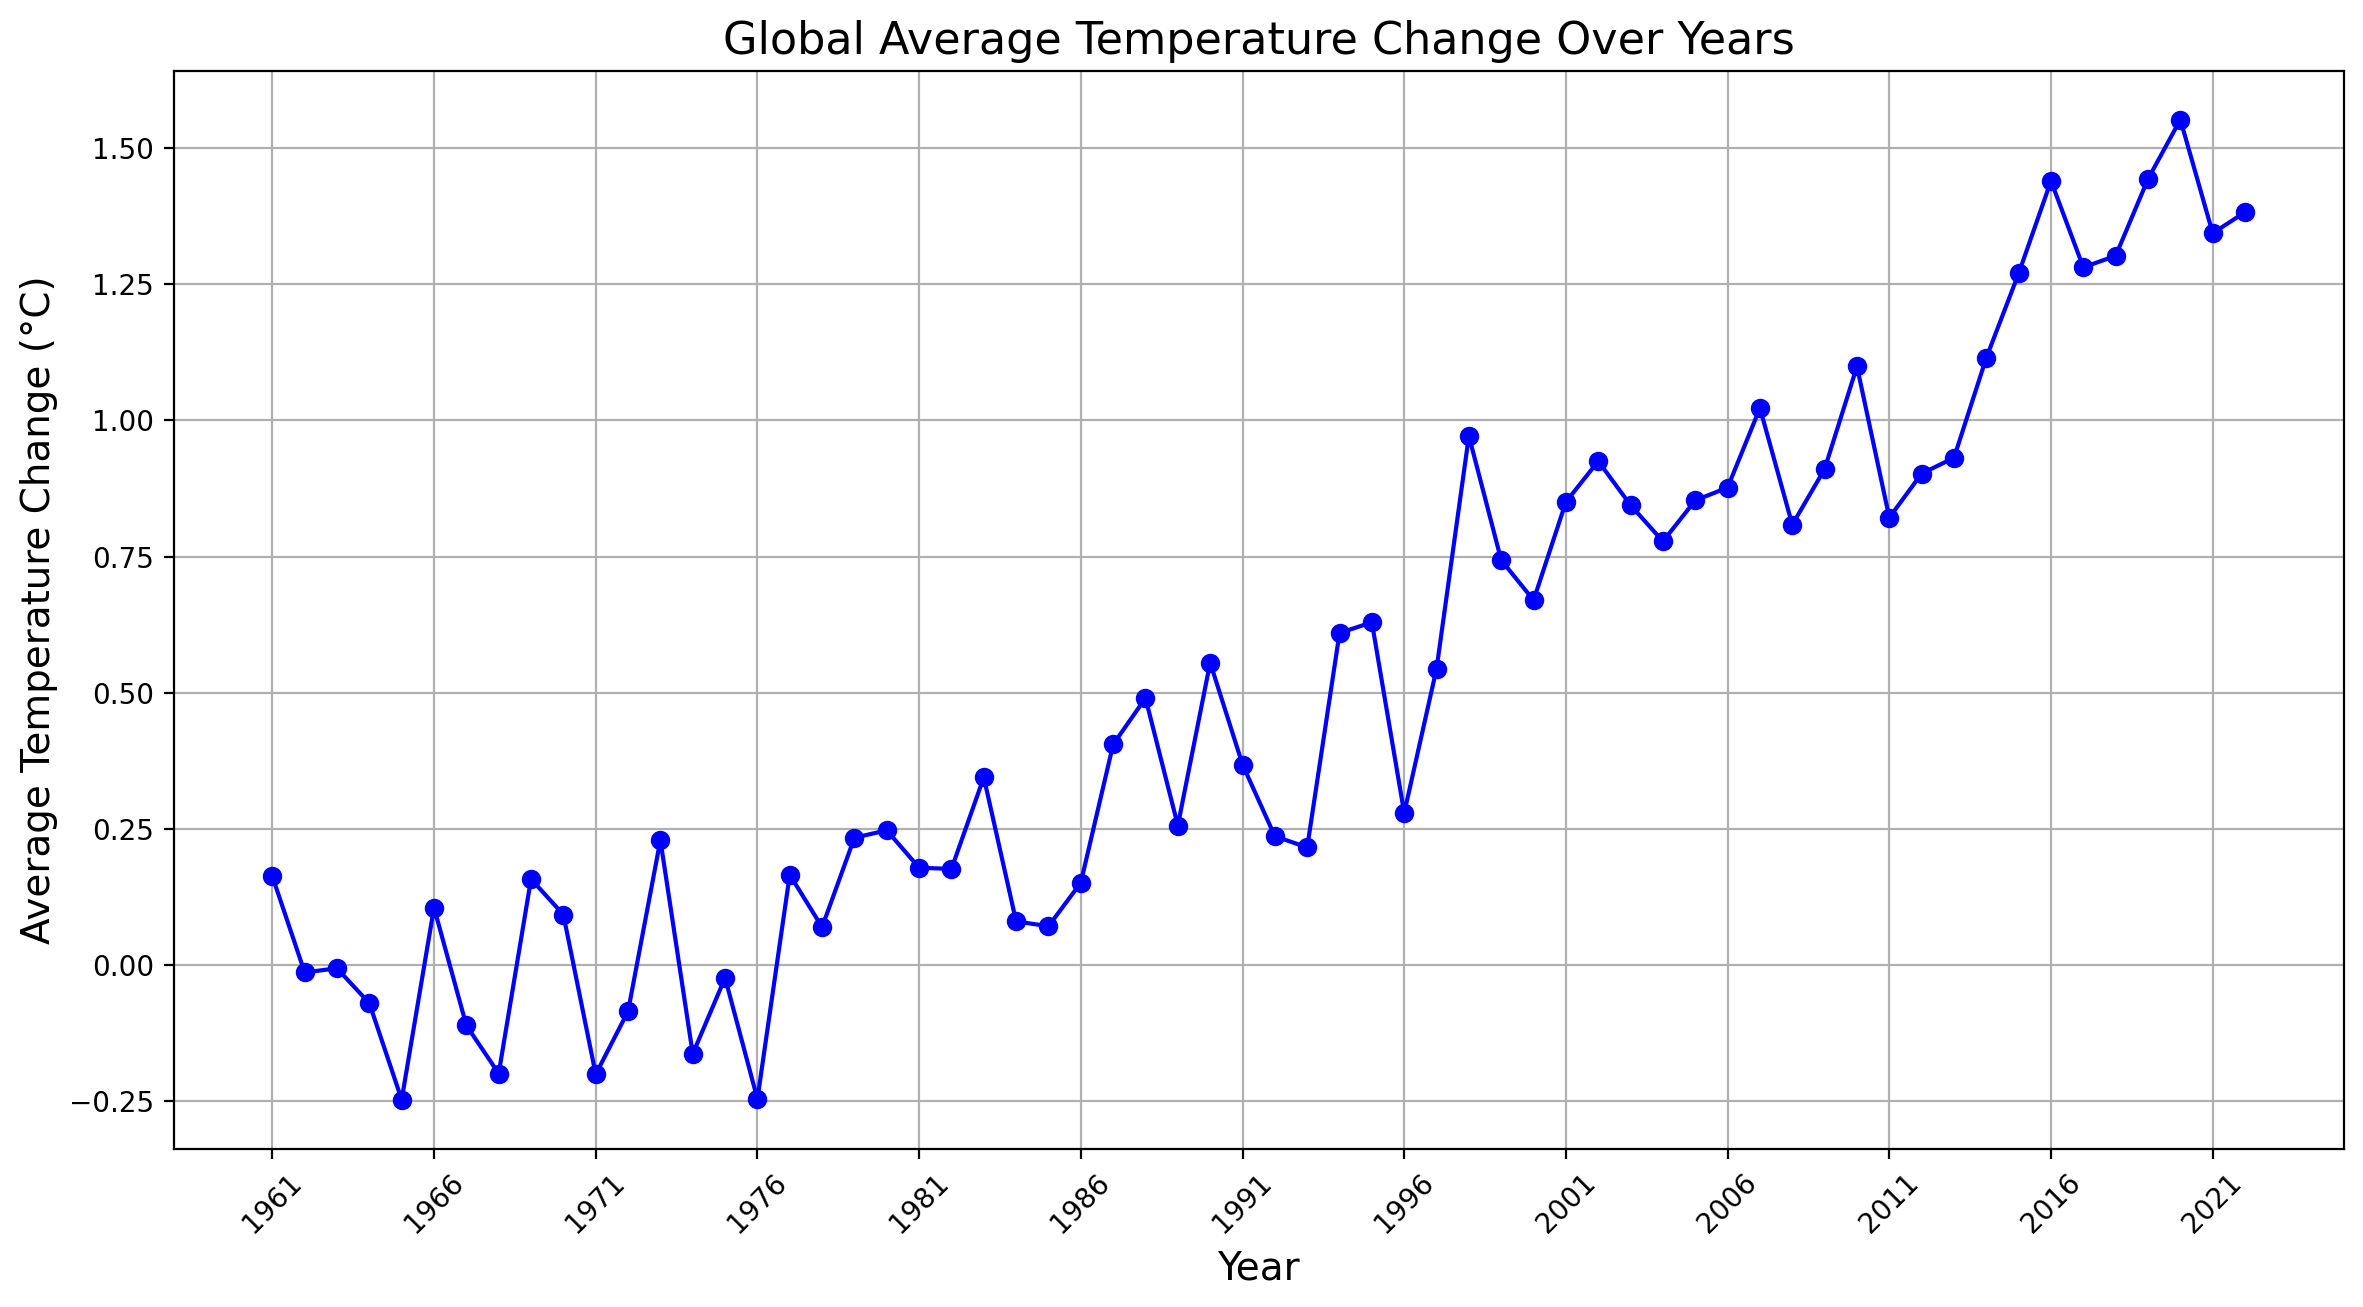

In [8]:
years = [col for col in df.columns if col.startswith('F')]
global_avg_temp_change = df[years].mean()

# Convert years from string 'FYYYY' to integer YYYY for plotting
int_years = [int(year[1:]) for year in years]

# Time Series Plot
plt.figure(figsize=(14, 7))
plt.plot(int_years, global_avg_temp_change, marker='o', linestyle='-', color='b')
plt.title('Global Average Temperature Change Over Years', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average Temperature Change (°C)', fontsize=14)
plt.xticks(int_years[::5], rotation=45)  # Show every 5th year for clarity
plt.grid(True)
plt.show()

A heatmap to visualize temperature changes across different countries over a selected range of years

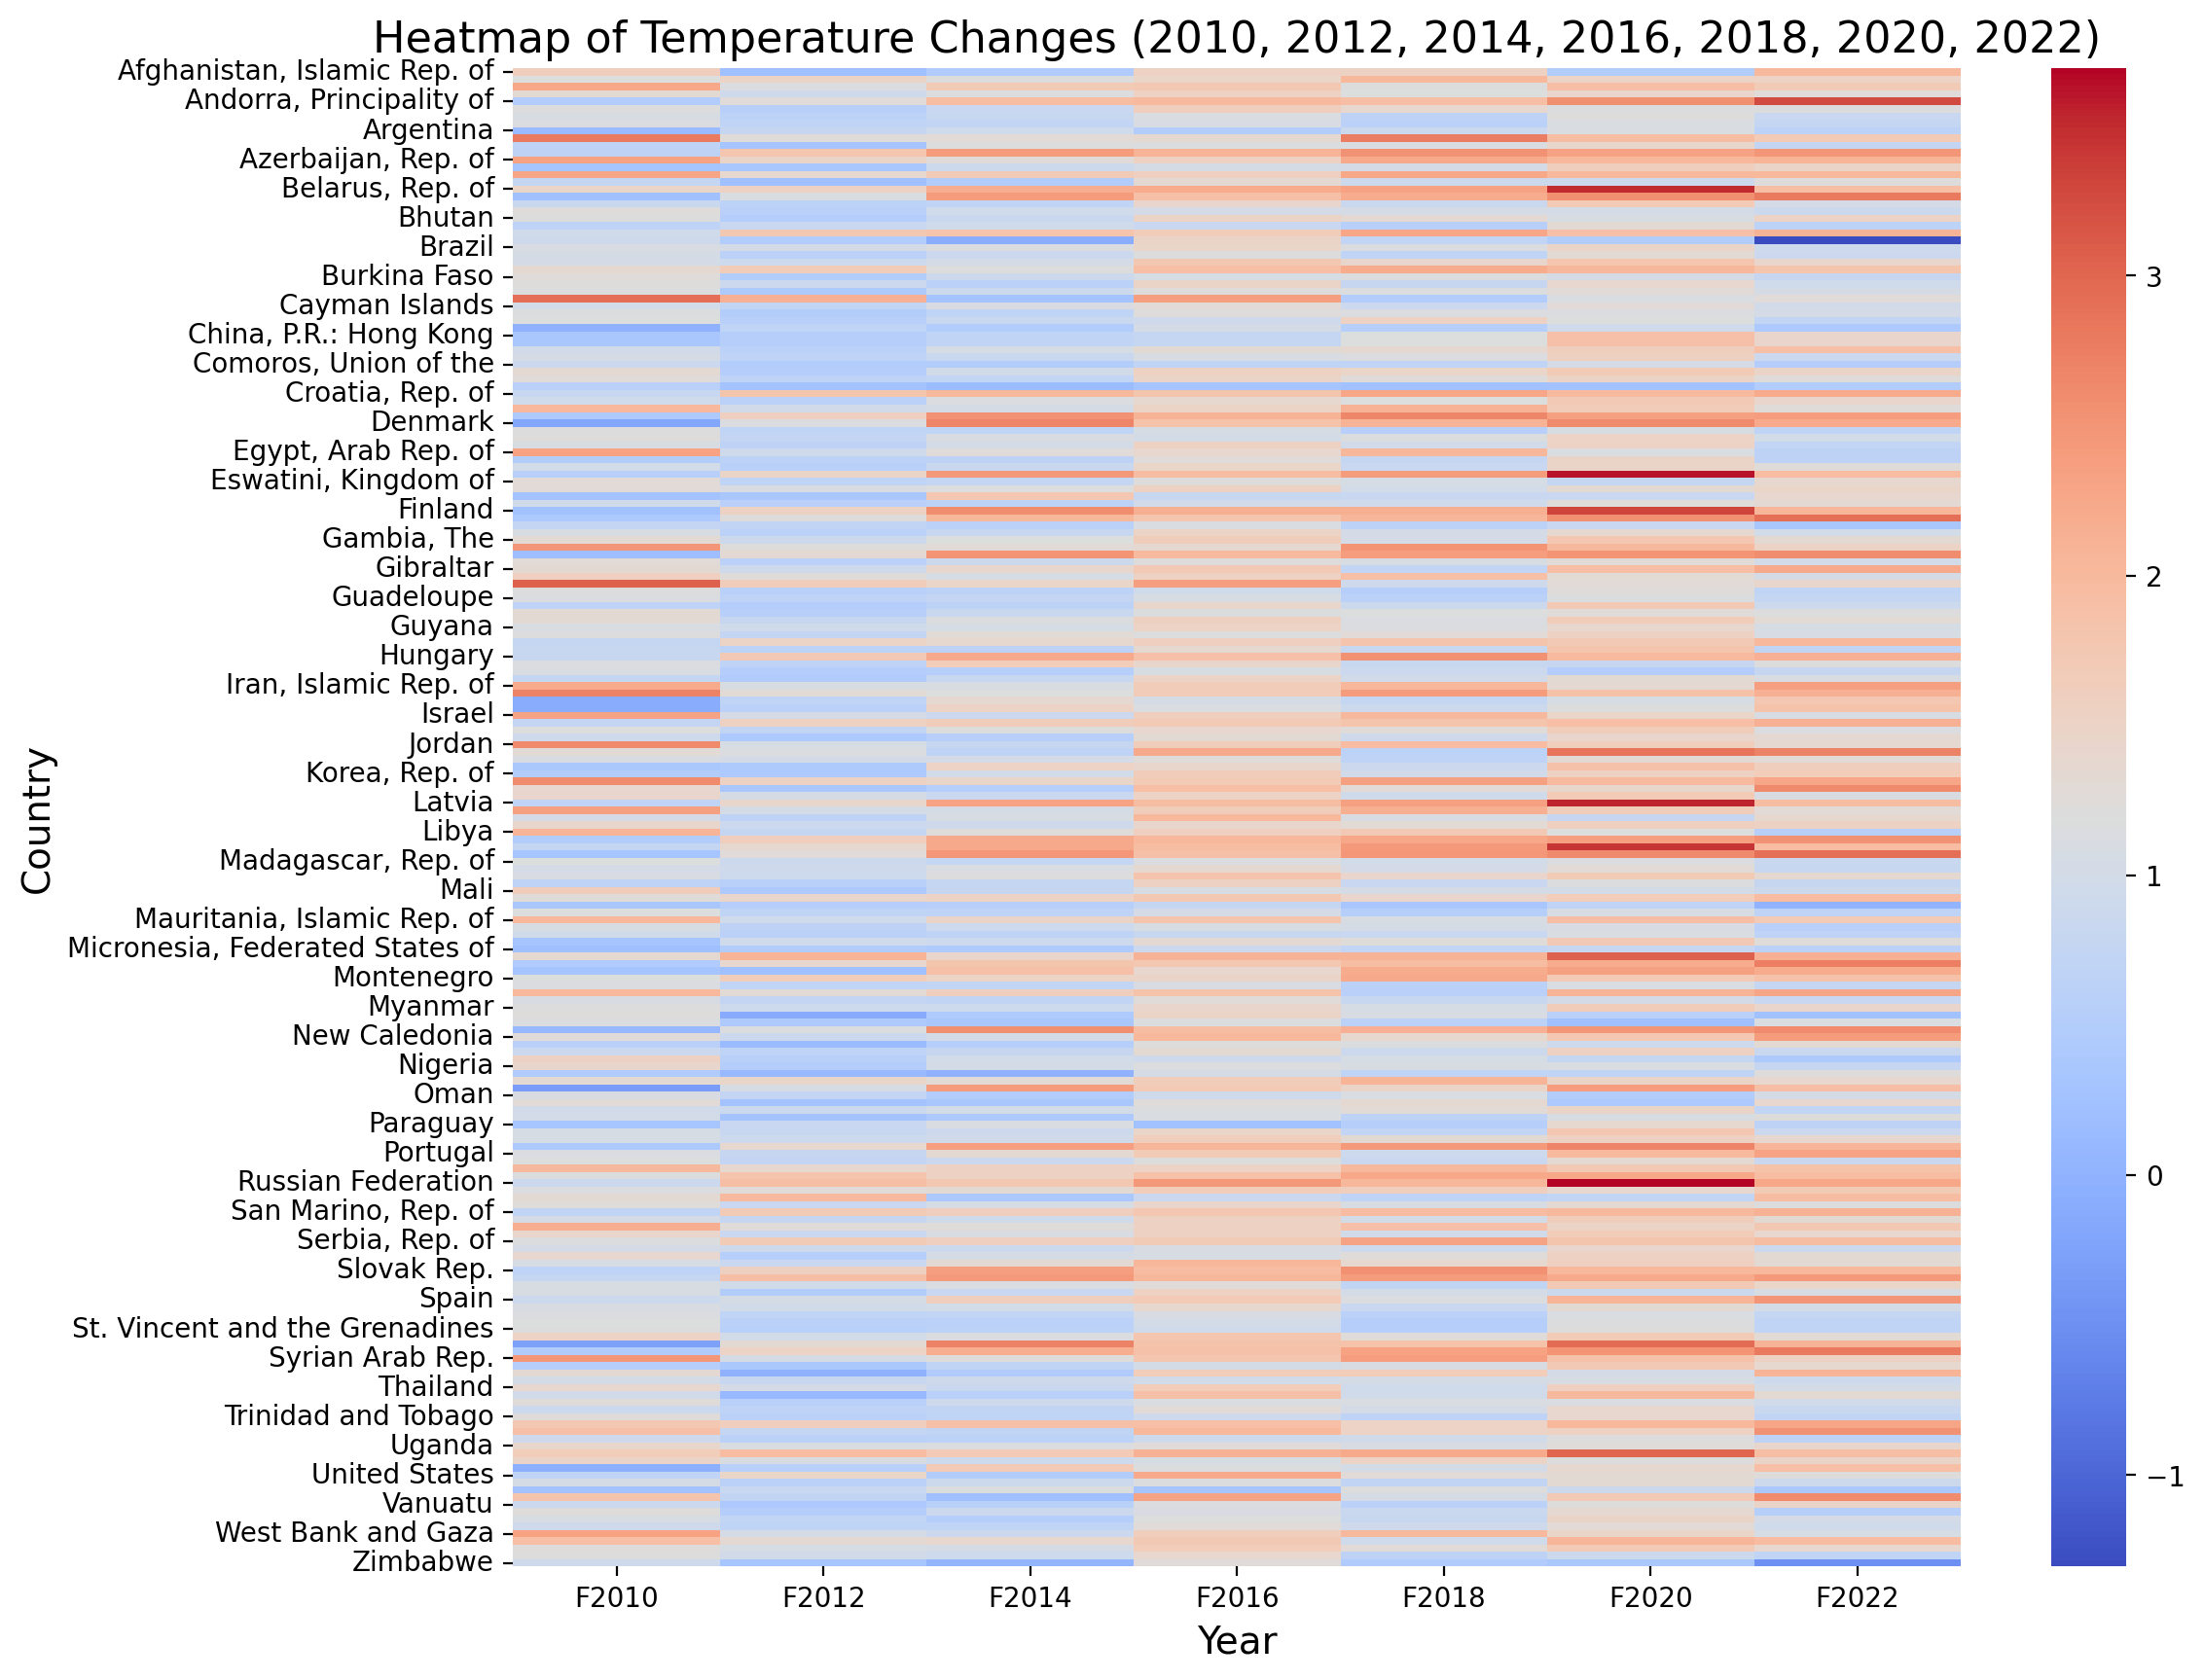

In [9]:
# For the heatmap, we'll select a subset of years for better visibility and clarity
selected_years = ['F2010', 'F2012', 'F2014', 'F2016', 'F2018', 'F2020', 'F2022']
heatmap_data = df.set_index('Country')[selected_years].dropna()  # Drop countries with missing values for simplicity

# Creating a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(heatmap_data, cmap='coolwarm')
plt.title('Heatmap of Temperature Changes (2010, 2012, 2014, 2016, 2018, 2020, 2022)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Country', fontsize=14)
plt.show()

The distribution of temperature changes across different decades

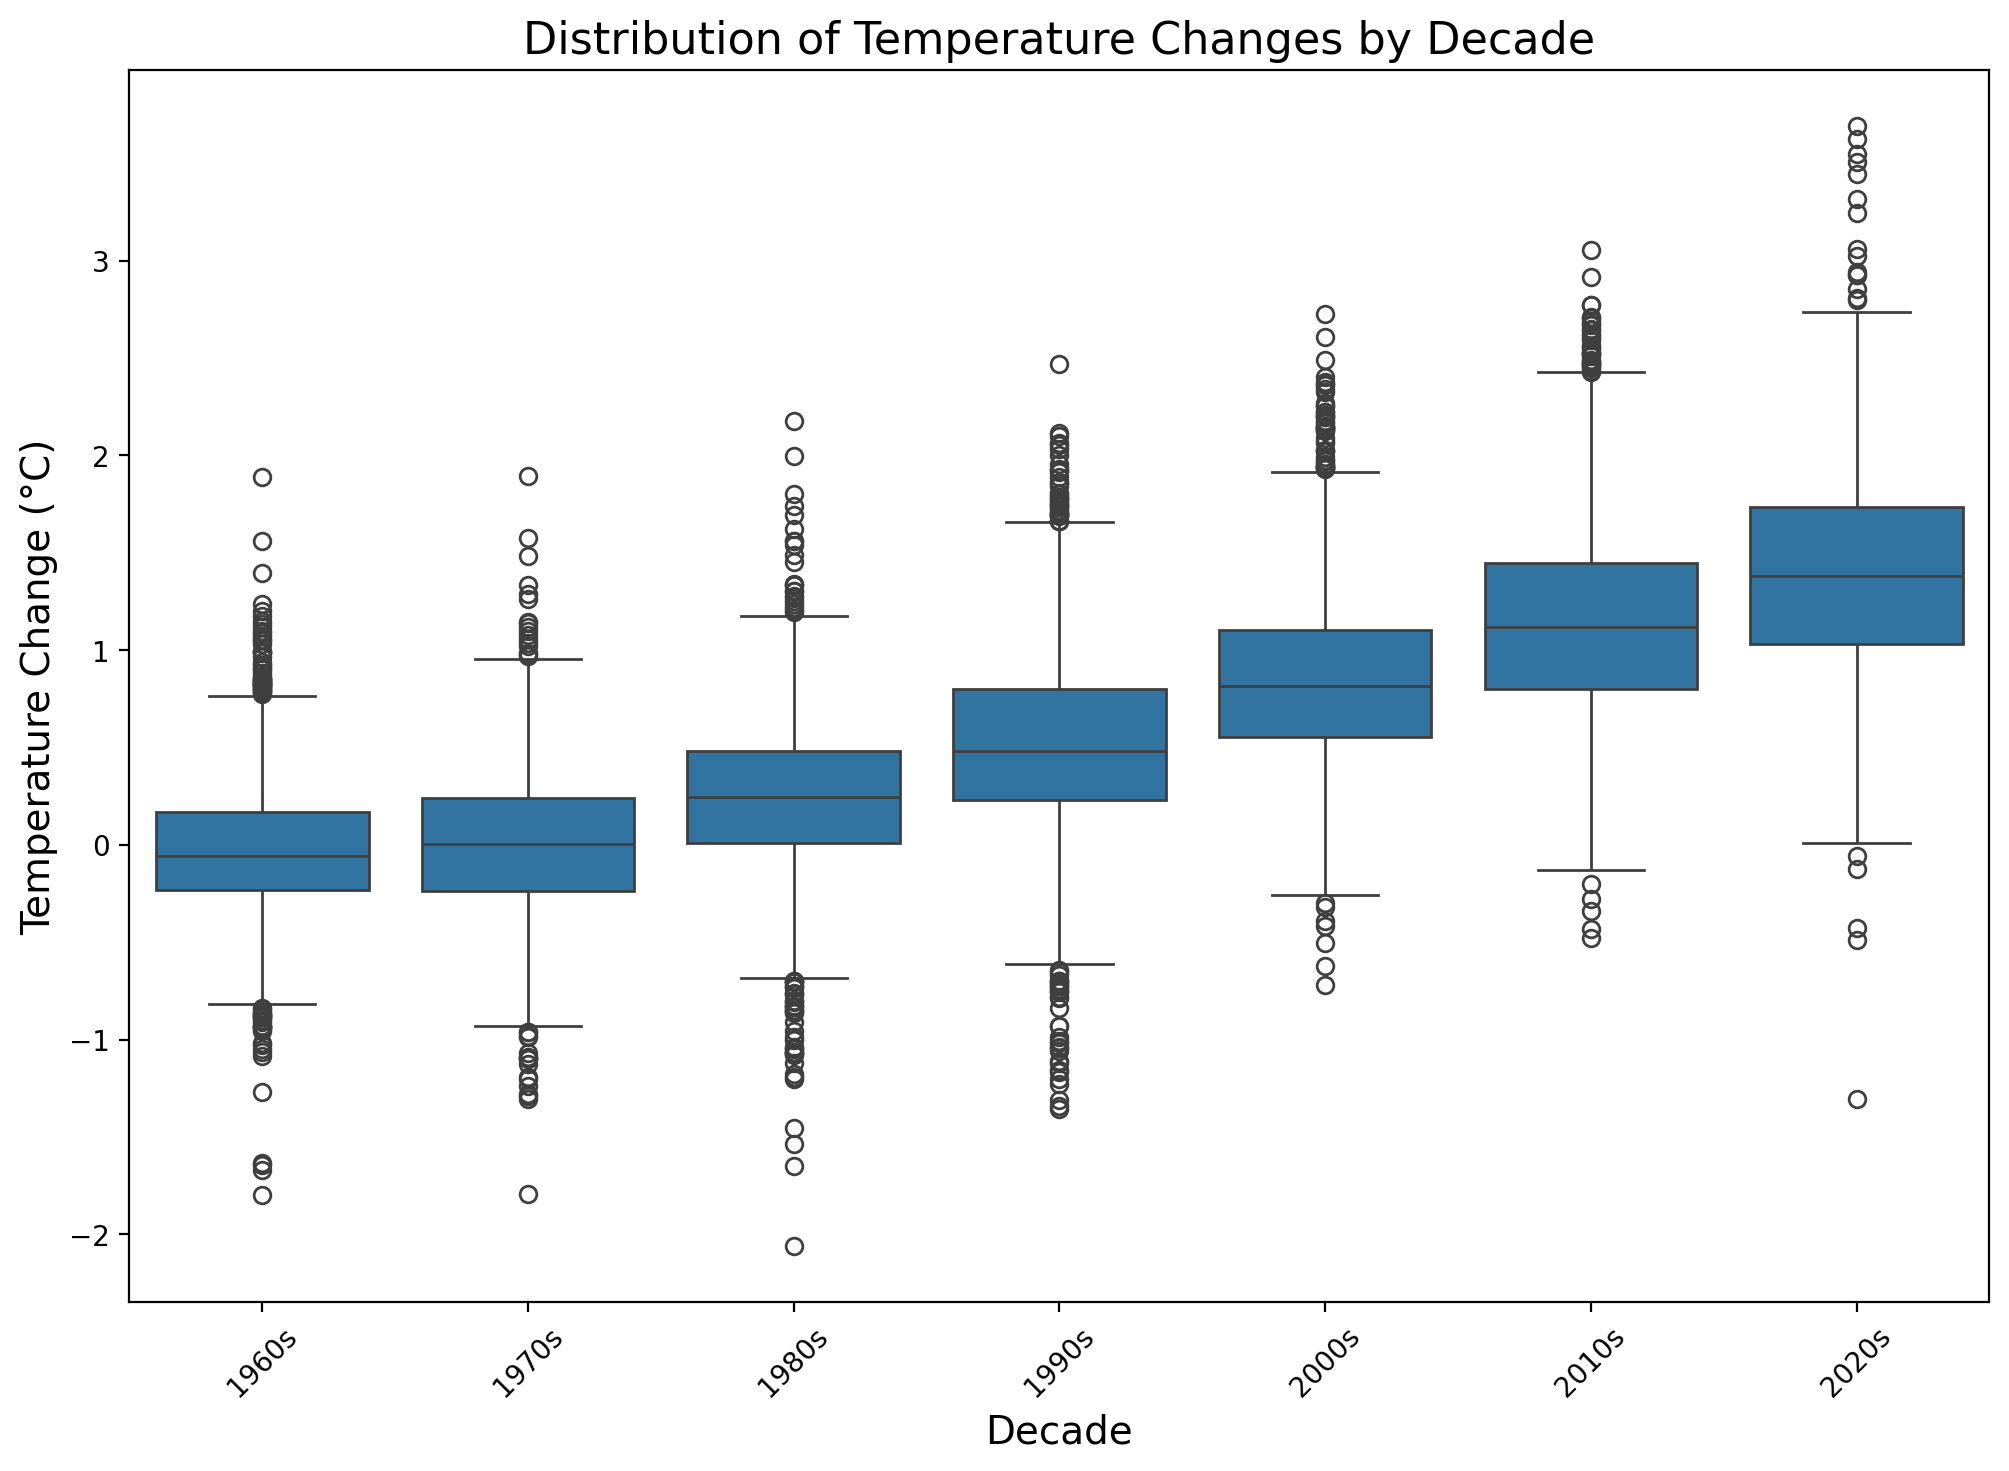

In [10]:
# For the box plot, we'll categorize the years into decades for simplicity

# Creating a new DataFrame with year as a column and a new decade column

decade_data = pd.melt(df, id_vars=['Country'], value_vars=years, var_name='Year', value_name='TempChange')
decade_data['Decade'] = decade_data['Year'].apply(lambda x: x[1:4] + "0s")  # Group years into decades

# Creating the box plot
plt.figure(figsize=(12, 8))
sns.boxplot(x='Decade', y='TempChange', data=decade_data)
plt.title('Distribution of Temperature Changes by Decade', fontsize=16)
plt.xlabel('Decade', fontsize=14)
plt.ylabel('Temperature Change (°C)', fontsize=14)
plt.xticks(rotation=45)
plt.show()

In [11]:
print(df.columns)

Index(['ObjectId', 'Country', 'ISO2', 'ISO3', 'Indicator', 'Unit', 'Source',
       'CTS_Code', 'CTS_Name', 'CTS_Full_Descriptor', 'F1961', 'F1962',
       'F1963', 'F1964', 'F1965', 'F1966', 'F1967', 'F1968', 'F1969', 'F1970',
       'F1971', 'F1972', 'F1973', 'F1974', 'F1975', 'F1976', 'F1977', 'F1978',
       'F1979', 'F1980', 'F1981', 'F1982', 'F1983', 'F1984', 'F1985', 'F1986',
       'F1987', 'F1988', 'F1989', 'F1990', 'F1991', 'F1992', 'F1993', 'F1994',
       'F1995', 'F1996', 'F1997', 'F1998', 'F1999', 'F2000', 'F2001', 'F2002',
       'F2003', 'F2004', 'F2005', 'F2006', 'F2007', 'F2008', 'F2009', 'F2010',
       'F2011', 'F2012', 'F2013', 'F2014', 'F2015', 'F2016', 'F2017', 'F2018',
       'F2019', 'F2020', 'F2021', 'F2022'],
      dtype='object')


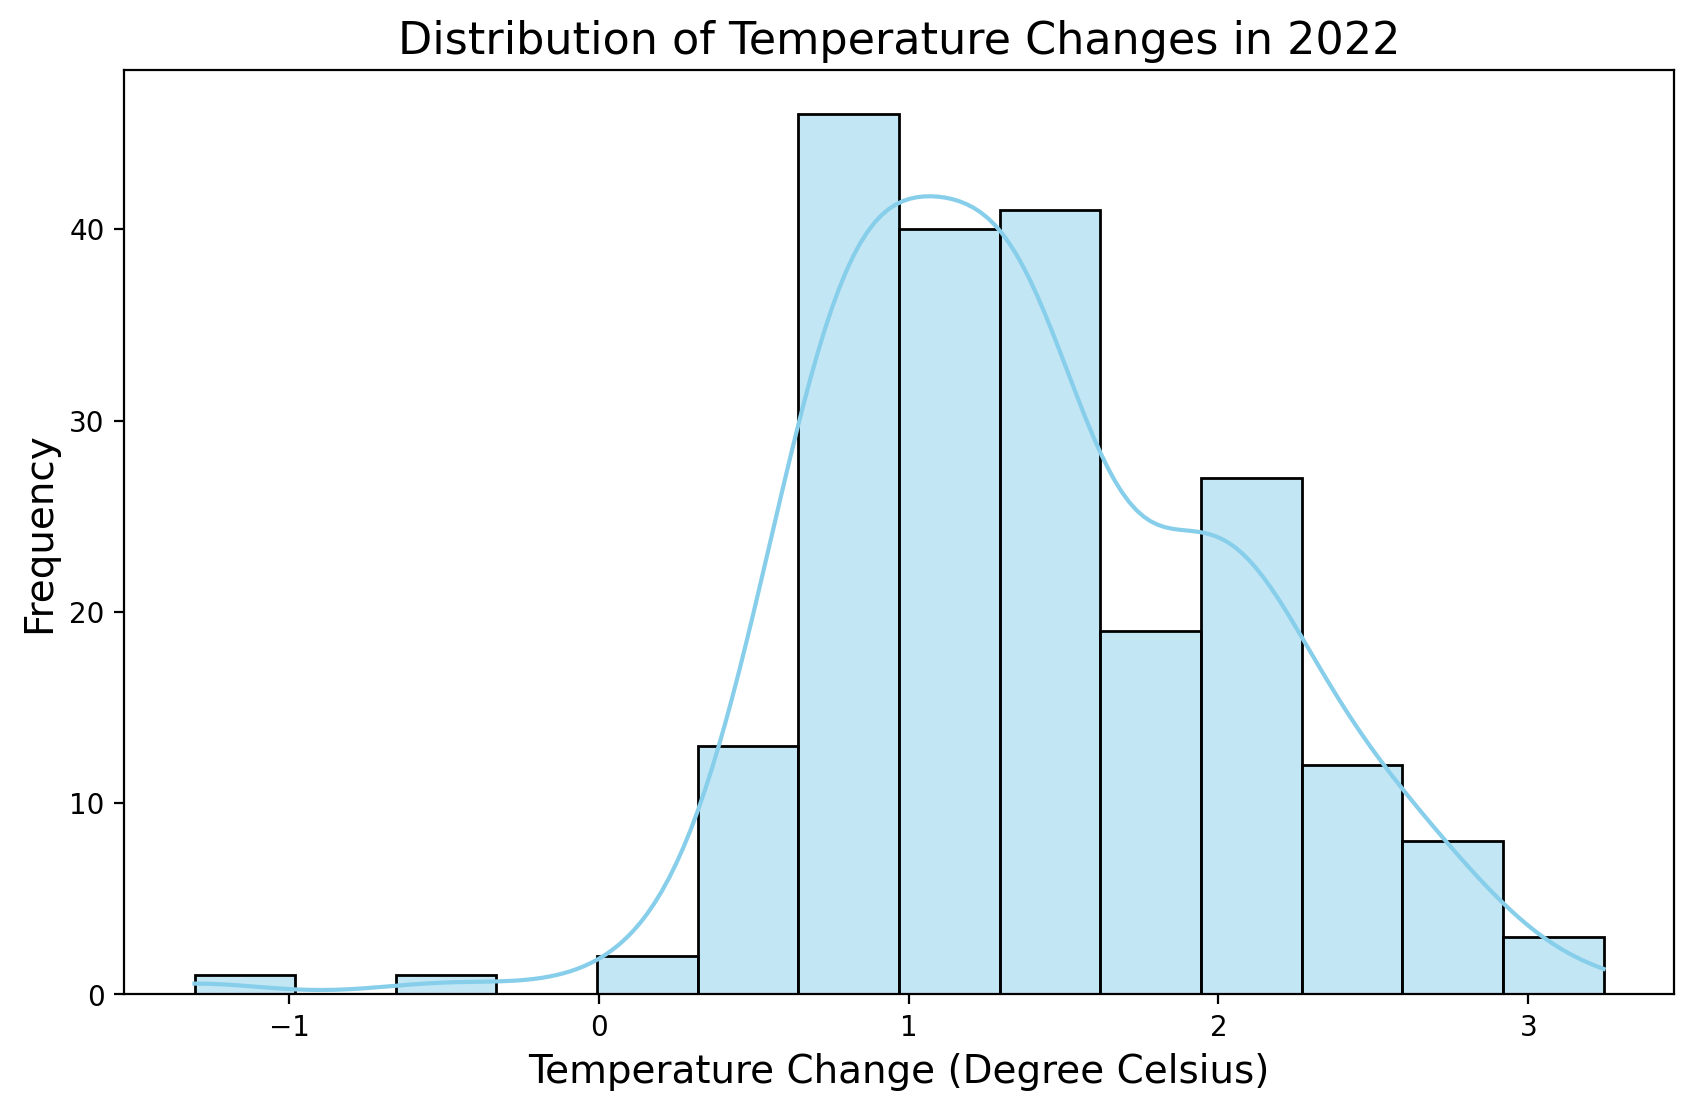

In [12]:
#  The distribution of temperature changes in 2022 (in degrees Celsius) across different countries.
import matplotlib.pyplot as plt
import seaborn as sns

# Set the plot size for better readability
plt.figure(figsize=(10, 6))

# Create the histogram for temperature changes in 2022
sns.histplot(df['F2022'], color='skyblue', kde=True)

# Add a title to the plot
plt.title('Distribution of Temperature Changes in 2022', fontsize=16)

# Label the axes
plt.xlabel('Temperature Change (Degree Celsius)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Show the plot
plt.show()

In [13]:
# Predict temperature change in 2022 (F2022)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import numpy as np

# Data Preparation
# Dropping rows with missing values in the specified columns to keep the example simple
df_clean = df[['F2020', 'F2021', 'F2022']].dropna()

# Feature Selection
X = df_clean[['F2020', 'F2021']].values  # Features: Temperature changes in 2020 and 2021
y = df_clean['F2022'].values  # Target: Temperature changes in 2022

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Training
model = LinearRegression()
model.fit(X_train, y_train)

# Prediction
y_pred = model.predict(X_test)

# Evaluation
r2 = r2_score(y_test, y_pred)

r2

0.36919374615084943

This metric indicates that around 59% of the variance in the temperature change for 2022

In [14]:
df = df[[
#     'ObjectId',
    'Country',
#     'ISO2',
    'ISO3',
#     'Indicator', 'Unit', 'Source',
#     'CTS_Code', 'CTS_Name', 'CTS_Full_Descriptor',
    'F1961', 'F1962',
    'F1963', 'F1964', 'F1965', 'F1966', 'F1967', 'F1968', 'F1969', 'F1970',
    'F1971', 'F1972', 'F1973', 'F1974', 'F1975', 'F1976', 'F1977', 'F1978',
    'F1979', 'F1980', 'F1981', 'F1982', 'F1983', 'F1984', 'F1985', 'F1986',
    'F1987', 'F1988', 'F1989', 'F1990', 'F1991', 'F1992', 'F1993', 'F1994',
    'F1995', 'F1996', 'F1997', 'F1998', 'F1999', 'F2000', 'F2001', 'F2002',
    'F2003', 'F2004', 'F2005', 'F2006', 'F2007', 'F2008', 'F2009', 'F2010',
    'F2011', 'F2012', 'F2013', 'F2014', 'F2015', 'F2016', 'F2017', 'F2018',
    'F2019', 'F2020', 'F2021', 'F2022'
]].copy()

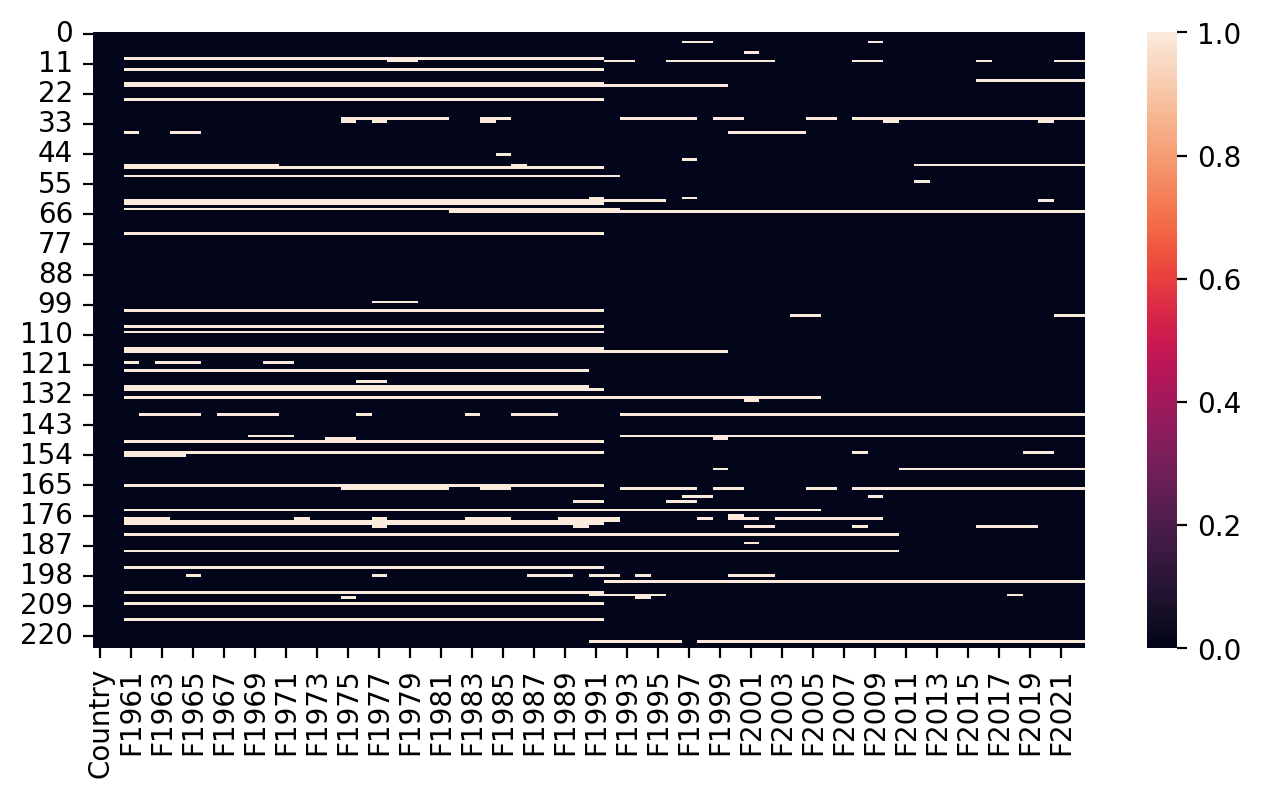

In [15]:
plt.figure(figsize = (8, 4), facecolor = "white")

sns.heatmap(
    df.isnull(), vmin = 0, vmax = 1
)

plt.show()

In [16]:
df.isnull().sum()[[
    'F1990', 'F1991', 'F1992', 'F1993'
]]

,0
F1990,36
F1991,37
F1992,17
F1993,16


There is a significant difference in the number of missing rows around 1992.

In [17]:
df_climate_dim = df[[
    'Country', 'ISO3',
    'F1992', 'F2002', 'F2012', 'F2022'
]]
df_climate_dim.head()

,Country,ISO3,F1992,F2002,F2012,F2022
0,"Afghanistan, Islamic Rep. of",AFG,-0.294,1.365,0.223,2.012
1,Albania,ALB,0.106,0.492,1.487,1.518
2,Algeria,DZA,-0.312,1.258,1.147,1.688
3,American Samoa,ASM,0.344,1.152,0.924,1.256
4,"Andorra, Principality of",AND,0.386,0.835,1.265,3.243


In [18]:
df_climate_dim = df_climate_dim.dropna().reset_index(drop = True).copy()

Clustering

In [19]:
from sklearn.cluster import KMeans

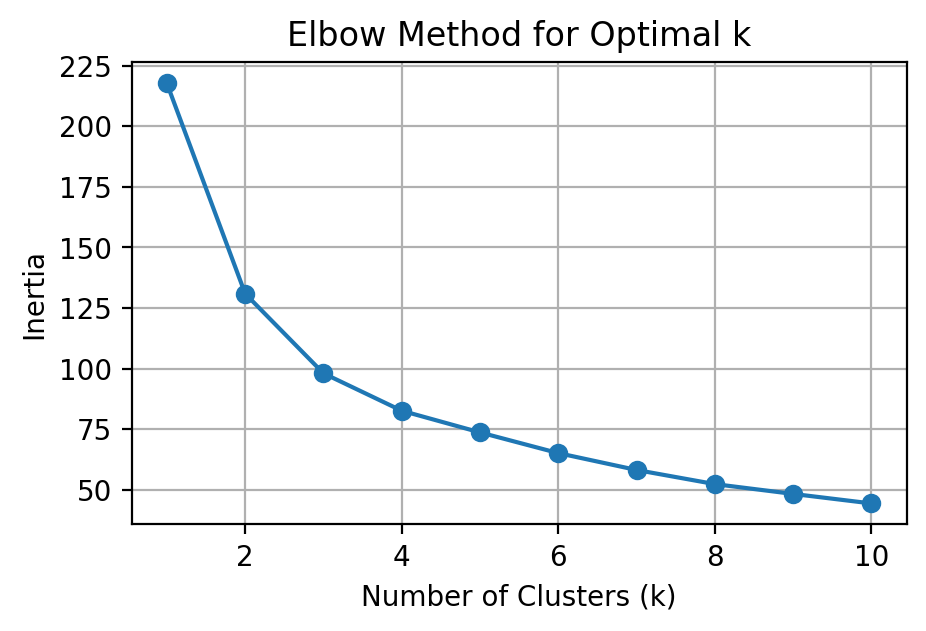

In [20]:
# select the columns for clustering
X = df_climate_dim.iloc[:, 2:]

# list to store the inertia values
list_inertia = []

# range of cluster numbers
k_range = range(1, 11)

# calculate inertiafor k in k_range:
for k in k_range:
    kmeans = KMeans(n_clusters = k, n_init = 10, random_state = 84)
    kmeans.fit(X)
    list_inertia.append(kmeans.inertia_)

# plotting
plt.figure(figsize = (5, 3), facecolor = "white")
plt.plot(k_range, list_inertia, marker = 'o', linestyle = '-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()

In [21]:
n_clusters = 3

# clustering
kmeans = KMeans(n_clusters = n_clusters, n_init = 10, random_state = 84)
df_climate_dim['Cluster'] = kmeans.fit_predict(X)

# Display the clustered data
display(df_climate_dim)

,Country,ISO3,F1992,F2002,F2012,F2022,Cluster
0,"Afghanistan, Islamic Rep. of",AFG,-0.294,1.365,0.223,2.012,0
1,Albania,ALB,0.106,0.492,1.487,1.518,1
2,Algeria,DZA,-0.312,1.258,1.147,1.688,0
3,American Samoa,ASM,0.344,1.152,0.924,1.256,1
4,"Andorra, Principality of",AND,0.386,0.835,1.265,3.243,2
...,...,...,...,...,...,...,...
192,West Bank and Gaza,PSE,-1.045,0.728,1.043,1.074,0
193,Western Sahara,ESH,0.529,1.249,1.344,1.970,2
194,World,WLD,0.184,1.021,1.074,1.394,1
195,Zambia,ZMB,0.544,0.711,0.972,0.686,1


Inspection

In [22]:
df_climate_dim['Cluster'].value_counts()

,count
Cluster,
1,125
2,48
0,24


In [23]:
# table
df_cluster_stats = df_climate_dim.groupby('Cluster').agg({
    'F1992': ['mean', 'std', 'min', 'max'],
    'F2002': ['mean', 'std', 'min', 'max'],
    'F2012': ['mean', 'std', 'min', 'max'],
    'F2022': ['mean', 'std', 'min', 'max']
}).round(3)
display(df_cluster_stats.T)

Cluster         0      1      2
F1992 mean -0.798  0.262  0.705
      std   0.384  0.350  0.457
      min  -1.344 -0.716 -0.059
      max   0.100  1.147  1.601
F2002 mean  1.039  0.740  1.332
      std   0.404  0.224  0.352
      min   0.009  0.017  0.681
      max   1.716  1.380  2.255
F2012 mean  1.178  0.672  1.314
      std   0.459  0.251  0.428
      min  -0.032 -0.128  0.230
      max   2.144  1.487  2.089
F2022 mean  1.636  0.991  2.218
      std   0.415  0.427  0.356
      min   1.040 -1.305  1.405
      max   2.370  1.840  3.243

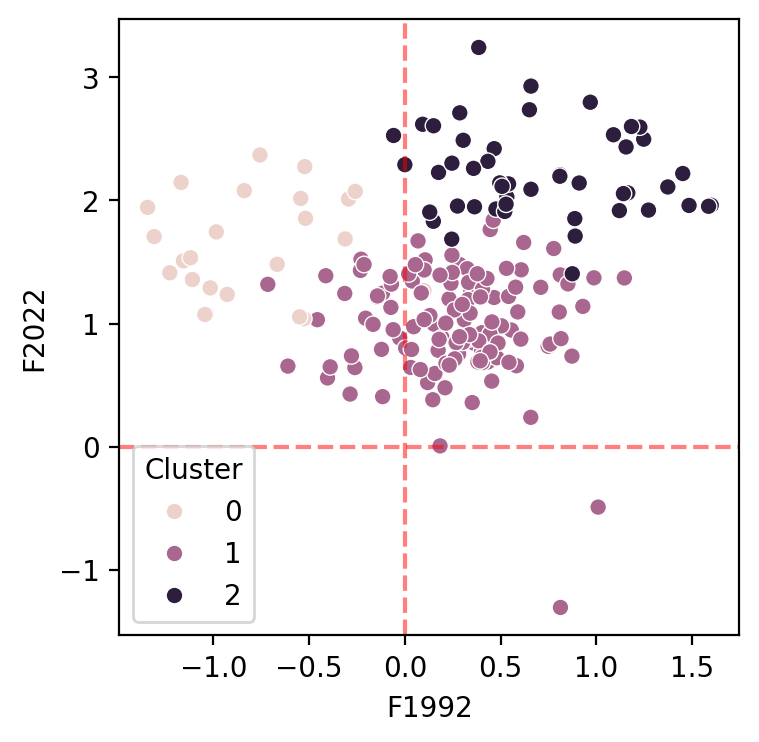

In [24]:
# scatterplot
plt.figure(figsize = (4, 4), facecolor = "white")
sns.scatterplot(
    data = df_climate_dim,
    x = 'F1992', y = 'F2022',
    hue = 'Cluster'
)
plt.axhline(
    0, 0, 1,
    color = "red", linestyle = "--", alpha = 0.5
)
plt.axvline(
    0, 0, 1,
    color = "red", linestyle = "--", alpha = 0.5
)
plt.show()

Visualization

In [25]:
print(list(df_climate_dim.query("Cluster == 0")['Country']))

['Afghanistan, Islamic Rep. of', 'Algeria', 'Armenia, Rep. of', 'Azerbaijan, Rep. of', 'Bahrain, Kingdom of', 'Canada', 'Cyprus', 'Georgia', 'Greece', 'Greenland', 'Iran, Islamic Rep. of', 'Iraq', 'Israel', 'Jordan', 'Kuwait', 'Lebanon', 'Oman', 'Qatar', 'Saint Pierre and Miquelon', 'Saudi Arabia', 'Syrian Arab Rep.', 'Tajikistan, Rep. of', 'United Arab Emirates', 'West Bank and Gaza']


Cluster 0:

In 1992, these countries showed a decrease, while in 2022, they exhibited moderate increases.
Primarily countries in Central Asia and the Arab region.

In [26]:
print(list(df_climate_dim.query("Cluster == 2")['Country']))

['Andorra, Principality of', 'Austria', 'Belarus, Rep. of', 'Bosnia and Herzegovina', 'Bulgaria', 'Cabo Verde', 'China, P.R.: Mainland', 'Croatia, Rep. of', 'Denmark', 'Estonia, Rep. of', 'Finland', 'France', 'Germany', 'Gibraltar', 'Holy See', 'Hungary', 'Italy', 'Kazakhstan, Rep. of', 'Kyrgyz Rep.', 'Latvia', 'Liechtenstein', 'Lithuania', 'Malta', 'Mauritania, Islamic Rep. of', 'Moldova, Rep. of', 'Monaco', 'Mongolia', 'Morocco', 'Netherlands, The', 'New Caledonia', 'Norway', 'Poland, Rep. of', 'Portugal', 'Romania', 'Russian Federation', 'Saint Helena', 'San Marino, Rep. of', 'Senegal', 'Slovenia, Rep. of', 'Spain', 'Sweden', 'Switzerland', 'Tunisia', 'Turkmenistan', 'Ukraine', 'United Kingdom', 'Uzbekistan, Rep. of', 'Western Sahara']


Cluster 2:

In 1992, these countries showed a increase, and in 2022, they experienced substantial rises.
Primarily countries in Europe.